In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from decimal import Decimal

# Normalization calculation

header_rows0 = 12 
df00 = pd.read_csv('data/initial/C2--SNL--00003.csv', skiprows=header_rows0)
df01 = pd.read_csv('data/initial/C2--SNL--00004.csv', skiprows=header_rows0)
df02 = pd.read_csv('data/initial/C2--SNL--00005.csv', skiprows=header_rows0)

print("Finish Reading initial files")

initial_ac_column0 = df00.iloc[:, 1].values
initial_ac_column1 = df01.iloc[:, 1].values
initial_ac_column2 = df02.iloc[:, 1].values

std0 = np.std(initial_ac_column0)
std1 = np.std(initial_ac_column1)
std2 = np.std(initial_ac_column2)

mean0 = np.mean(initial_ac_column0)
mean1 = np.mean(initial_ac_column1)
mean2 = np.mean(initial_ac_column2)

print("std0: ", std0)
print("std1: ", std1)
print("std2: ", std2)

print("mean0: ", mean0)
print("mean1: ", mean1)
print("mean2: ", mean2)

std = np.mean([std0, std1, std2])

# Verify the normalization
print("normalized_std0: ", np.std(initial_ac_column0 / std))
print("normalized_std1: ", np.std(initial_ac_column1 / std))
print("normalized_std2: ", np.std(initial_ac_column2 / std))
print("normalized_mean0: ", np.mean(initial_ac_column0 / std))
print("normalized_mean1: ", np.mean(initial_ac_column1 / std))
print("normalized_mean2: ", np.mean(initial_ac_column2 / std))

Finish Reading initial files
std0:  0.002793373071258766
std1:  0.0027939641429584124
std2:  0.0027954786916354157
mean0:  -0.00043838747940649886
mean1:  -0.0003407251930870224
mean2:  -0.000495930766111692
normalized_std0:  0.9996783071337118
normalized_std1:  0.9998898369011407
normalized_std2:  1.0004318559651477


In [2]:
# # Read CSV file
# header_rows = 12
# df = pd.read_csv('data/data.csv', skiprows=header_rows)

# # Get columns
# time_column = df.iloc[:, 0].values
# signal_column = df.iloc[:, 1].values
# bhd_ac_column = df.iloc[:, 2].values
# bhd_dc_column = df.iloc[:, 3].values

# Read CSV file
header_rows1 = 12 
df1 = pd.read_csv('data/raw/C1--SNL--00000.csv', skiprows=header_rows1)
df2 = pd.read_csv('data/raw/C2--SNL--00000.csv', skiprows=header_rows1)
df3 = pd.read_csv('data/raw/C3--SNL--00000.csv', skiprows=header_rows1)
# df4 = pd.read_csv('data/C4--SNL--00000.csv', skiprows=header_rows)

output_csv_file = 'data/fixed/bin_data_fixed_0.csv'

print("Finish Reading raw files")

# Get columns
# time_column = df1.iloc[:, 0].apply(Decimal).values
time_column = df1.iloc[:, 0].values
signal_column = df1.iloc[:, 1].values
bhd_ac_column = df2.iloc[:, 1].values
bhd_dc_column = df3.iloc[:, 1].values

# Trigger condition: rising edge
trigger_level = 2  # Trigger level in V
triggered = False
trigger_points = []

# Detect rising edge
for i in range(1, len(signal_column)):
    if signal_column[i-1] < trigger_level <= signal_column[i]:
        triggered = True
        trigger_points.append({'Time': time_column[i], 'Index': i})

# Output trigger points information
if triggered:
    # print("Rising Edge Trigger Points:")
    # for point in trigger_points:
    #     print(f"Time: {point['Time']}, Data Number: {point['Index']}")
    
    print(f"Total {len(trigger_points)} rising edge trigger points")
else:
    print("No rising edge trigger points detected")


Finish Reading raw files
Total 20020 rising edge trigger points


Max bin length: 14684
Min bin length: 1408


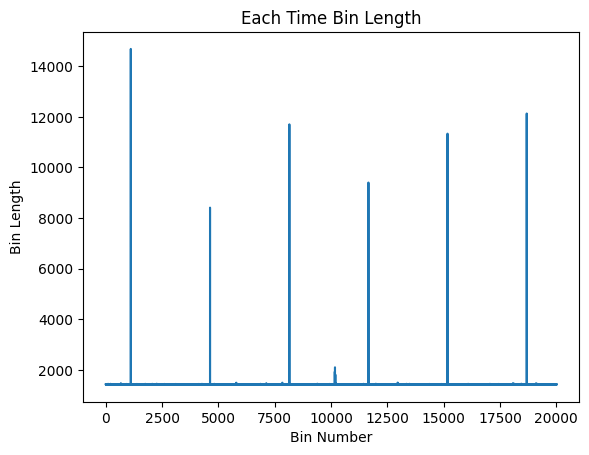

In [3]:
# Time bin analysis
bin_length = [0] * (len(trigger_points) - 1)
for i in range(1, len(trigger_points)):
    bin_length[i-1] = trigger_points[i]['Index'] - trigger_points[i-1]['Index']

max_bin_length = max(bin_length)
min_bin_length = min(bin_length)

print(f"Max bin length: {max_bin_length}")
print(f"Min bin length: {min_bin_length}")

plt.plot(bin_length)
# plt.xlim(6520, 6530)
# plt.ylim(280, 300)

plt.title('Each Time Bin Length')
plt.xlabel('Bin Number')
plt.ylabel('Bin Length')

plt.show()

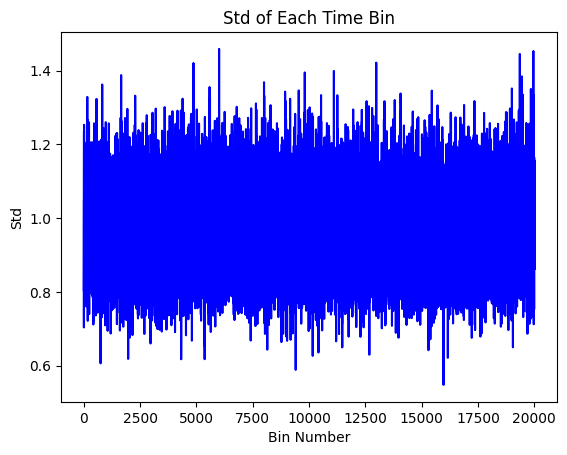

In [4]:
# Extract each time bin data from raw data
reduced_bin_length = min_bin_length
fix_percent = 0.5

bin_data_raw = np.zeros((len(trigger_points), reduced_bin_length))
bin_data_fixed = np.zeros((len(trigger_points), int(reduced_bin_length * fix_percent)))
bin_data_time_raw = np.zeros((len(trigger_points), reduced_bin_length))
bin_data_time_fixed = np.zeros((len(trigger_points), int(reduced_bin_length * fix_percent)))
for i in range(len(trigger_points)):
    start_index = trigger_points[i]['Index']
    end_index = start_index + reduced_bin_length
    fixed_start_index = end_index - int(reduced_bin_length * fix_percent)
    bin_data_raw[i] = bhd_ac_column[start_index:end_index]
    bin_data_fixed[i] = bhd_ac_column[fixed_start_index:end_index] / std
    bin_data_time_raw[i] = time_column[start_index:end_index]
    bin_data_time_fixed[i] = time_column[fixed_start_index:end_index]

# Calculate mean and std of each time bin
bin_data_raw_mean = np.zeros(len(trigger_points))
bin_data_raw_std = np.zeros(len(trigger_points))
bin_data_fixed_mean = np.zeros(len(trigger_points))
bin_data_fixed_std = np.zeros(len(trigger_points))
for i in range(len(trigger_points)):
    bin_data_raw_mean[i] = np.mean(bin_data_raw[i])
    bin_data_raw_std[i] = np.std(bin_data_raw[i])
    bin_data_fixed_mean[i] = np.mean(bin_data_fixed[i])
    bin_data_fixed_std[i] = np.std(bin_data_fixed[i])

# Plot std of each time bin
# plt.plot(bin_data_raw_std, 'r')
plt.plot(bin_data_fixed_std, 'b')
plt.title('Std of Each Time Bin')
plt.xlabel('Bin Number')
plt.ylabel('Std')
plt.show()

In [5]:
# Output bin data to csv file
output_data = np.insert(bin_data_fixed, 0, bin_data_time_fixed[0]-bin_data_time_fixed[0][0], axis=0)

import csv
with open(output_csv_file, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',')
    csvwriter.writerow([''] + [f'Bin_{i}' for i in range(1,bin_data_fixed.shape[0]+1)])
    csvwriter.writerow(['Mean'] + bin_data_fixed_mean.tolist())
    csvwriter.writerow(['Std'] + bin_data_fixed_std.tolist())
    csvwriter.writerow(['Relative_Time'])  # Empty row
    csvwriter.writerows(output_data.T)
print("Output bin data to csv file successfully")

Output bin data to csv file successfully
